2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Number of training samples: 8982
Number of test samples: 2246


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.2549 - loss: 3.6253 - val_accuracy: 0.4424 - val_loss: 2.7278
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5175 - loss: 2.3977 - val_accuracy: 0.6433 - val_loss: 1.7960
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6740 - loss: 1.6161 - val_accuracy: 0.6989 - val_loss: 1.4465
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7458 - loss: 1.2144 - val_accuracy: 0.7295 - val_loss: 1.2683
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7921 - loss: 1.0149 - val_accuracy: 0.7412 - val_loss: 1.1701
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8374 - loss: 0.8015 - val_accuracy: 0.7730 - val_loss: 1.0873
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8629 - loss: 0.6768 - val_accuracy: 0.7791 - val_loss: 1.0245
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8959 - loss: 0.5392 - val_accuracy: 0.7880 - v

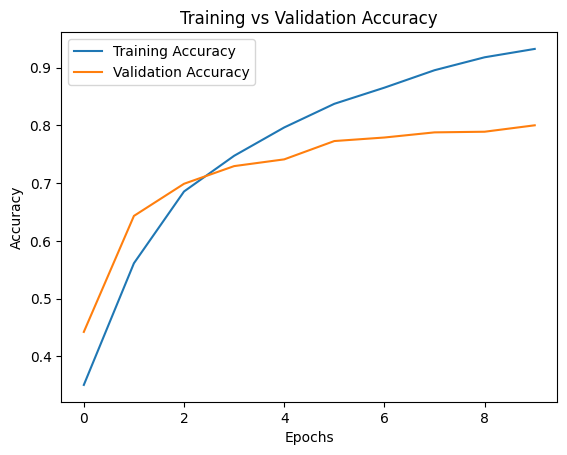

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7935 - loss: 0.9428

Test Accuracy: 0.7930
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted class for first test sample: 3


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
print(f"Number of training samples: {len(train_data)}")
print(f"Number of test samples: {len(test_data)}")


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)


model = Sequential([
    Dense(64, activation='relu', input_shape=(10000,)),
    Dense(64, activation='relu'),
    Dense(46, activation='softmax')  # 46 categories => softmax
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

predictions = model.predict(X_test)
predicted_class = np.argmax(predictions[0])
print(f"Predicted class for first test sample: {predicted_class}")
